import pandas as pd
import numpy as np

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("cab_rides.csv")
df2 = pd.read_csv("weather.csv")

In [3]:
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
df2.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [5]:
df1['date_time'] = pd.to_datetime(df1['time_stamp']/1000, unit='s')
df2['date_time'] = pd.to_datetime(df2['time_stamp'], unit='s')
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [6]:
#merge the datasets to refelect same time for a location
df1['merge_date'] = df1.source.astype(str) +" - "+ df1.date_time.dt.date.astype("str") +" - "+ df1.date_time.dt.hour.astype("str")
df2['merge_date'] = df2.location.astype(str) +" - "+ df2.date_time.dt.date.astype("str") +" - "+ df2.date_time.dt.hour.astype("str")

In [7]:
df2.index = df2['merge_date']

In [8]:
df1.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3


In [9]:
merged_df = df1.join(df2,on=['merge_date'],rsuffix ='_w')

In [10]:
merged_df['rain'].fillna(0,inplace=True)

In [11]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [12]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [13]:
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [14]:
merged_df['hour'] = merged_df.date_time.dt.hour

In [15]:
merged_df['day'].describe()


count    1.164996e+06
mean     2.388427e+00
std      1.743907e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.000000e+00
Name: day, dtype: float64

In [16]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [17]:
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

## Visualizations

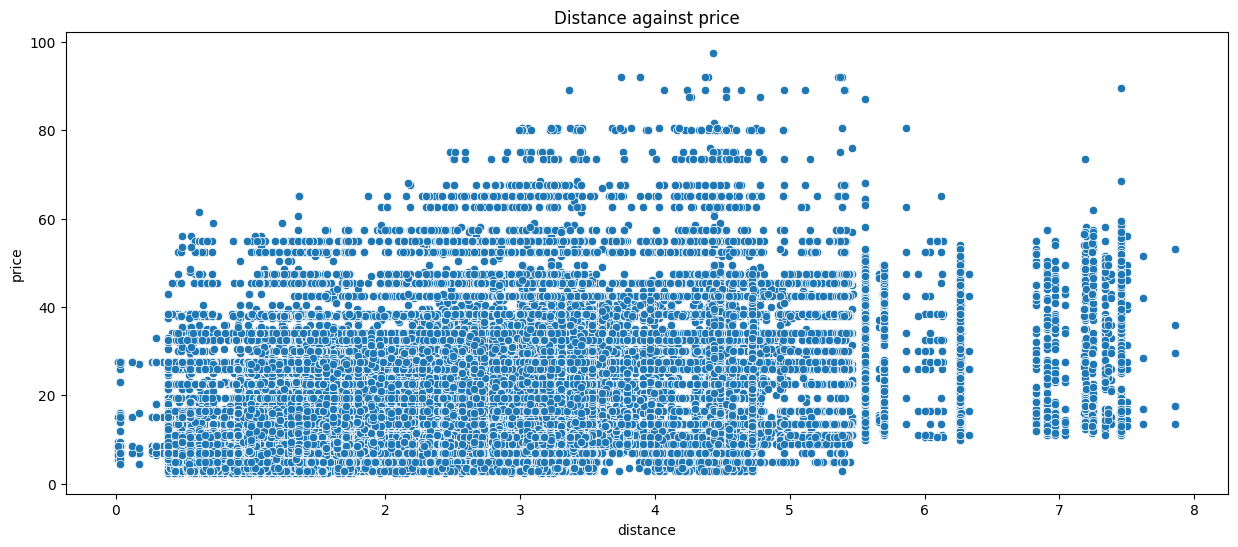

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='distance',y='price',data=merged_df)
ax.set_title("Distance against price")
ax.set_xlabel('distance')
ax.set_ylabel('price');

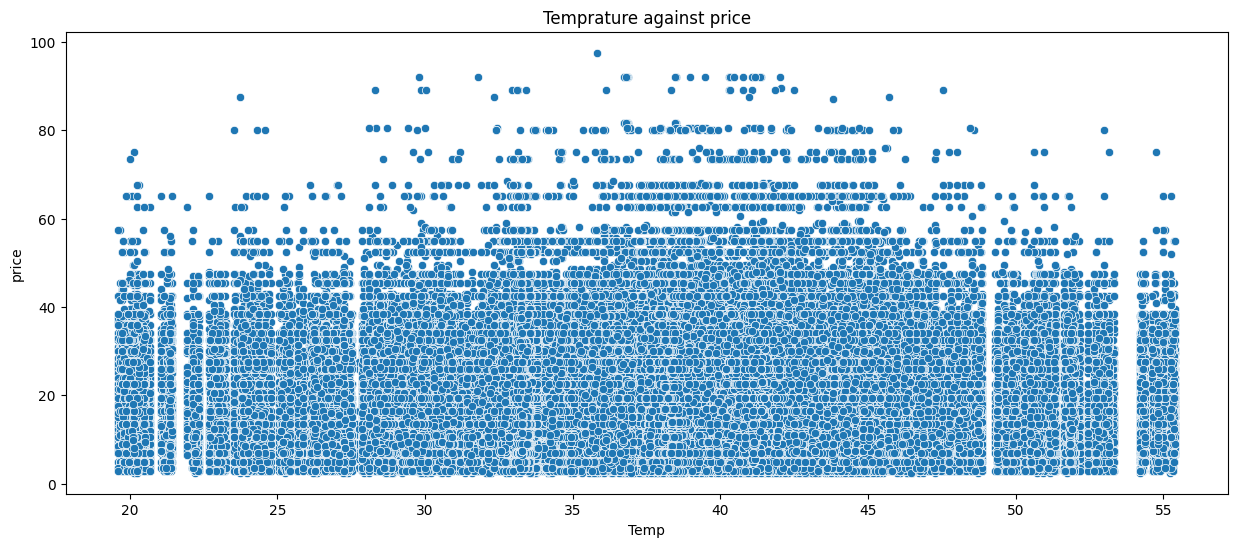

In [19]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='temp',y='price',data=merged_df)
ax.set_title("Temprature against price")
ax.set_xlabel('Temp')
ax.set_ylabel('price');

C:\Users\krsty\AppData\Local\Temp\ipykernel_2332\3274417633.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = heatmap_data.pivot('temp', 'price', 'count')


<Axes: xlabel='price', ylabel='temp'>

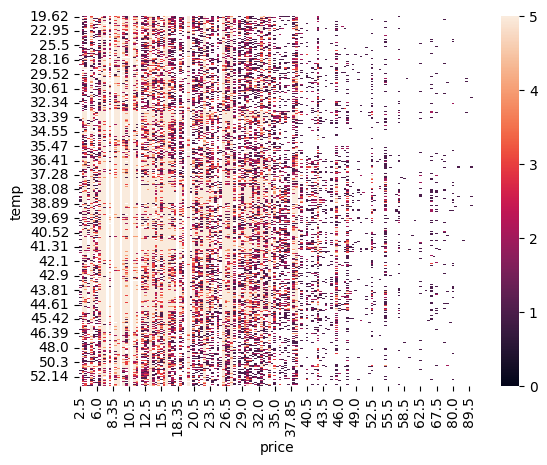

In [20]:
# assuming you have a DataFrame called df with columns 'temperature' and 'price'
heatmap_data = merged_df.groupby(['temp', 'price']).size().reset_index(name='count')
heatmap_data = heatmap_data.pivot('temp', 'price', 'count')
sns.heatmap(heatmap_data, vmin=0, vmax=5)

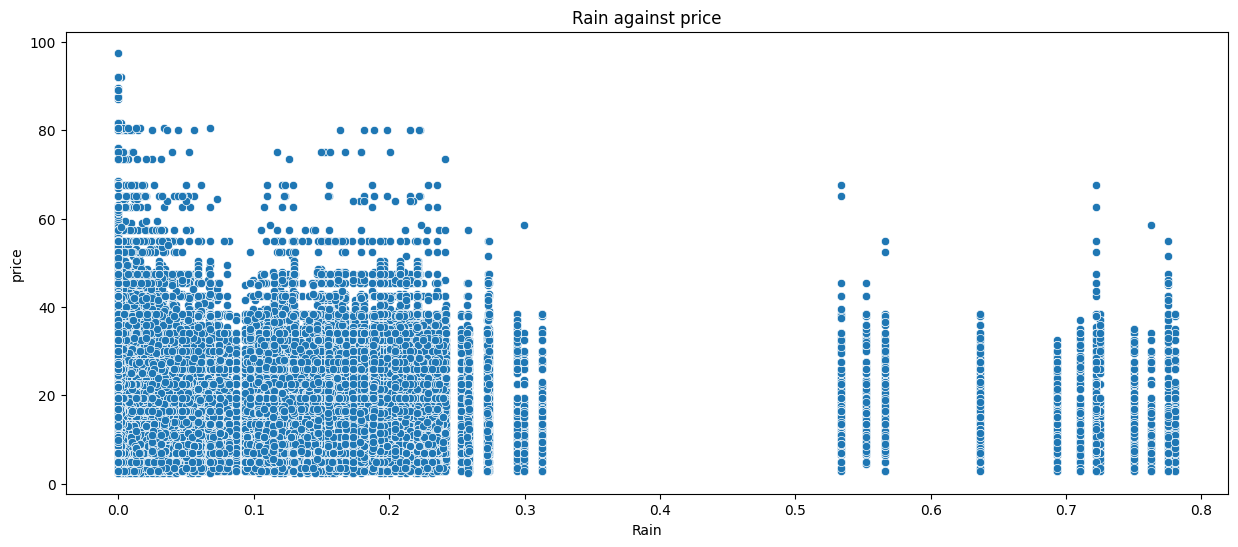

In [21]:
plt.figure(figsize=(15, 6))
ax = sns.scatterplot(x='rain',y='price',data=merged_df)
ax.set_title("Rain against price")
ax.set_xlabel('Rain')
ax.set_ylabel('price');

C:\Users\krsty\AppData\Local\Temp\ipykernel_2332\365232068.py:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 17, 1)


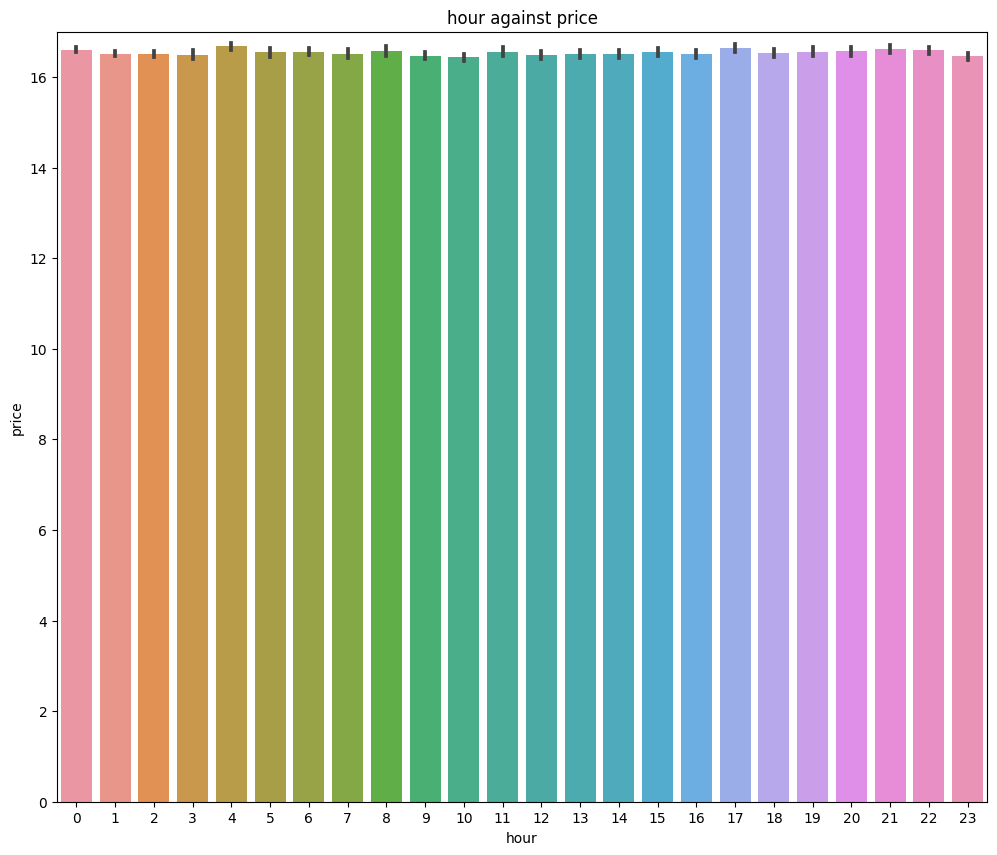

In [22]:
plt.figure(figsize=(12, 10))
plt.ylim(0, 17, 1)
ax = sns.barplot(x='hour',y='price',data=merged_df)
ax.set_title("hour against price")
ax.set_xlabel('hour')
ax.set_ylabel('price');

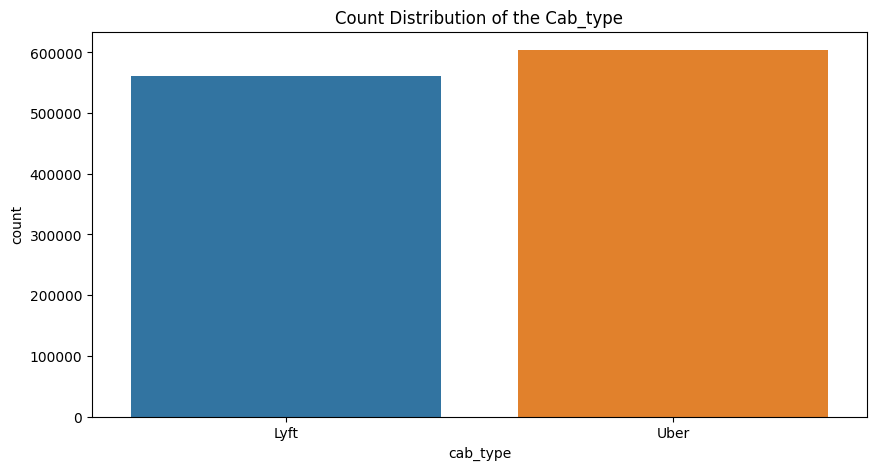

In [23]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='cab_type', data=merged_df)
ax.set_title('Count Distribution of the Cab_type');

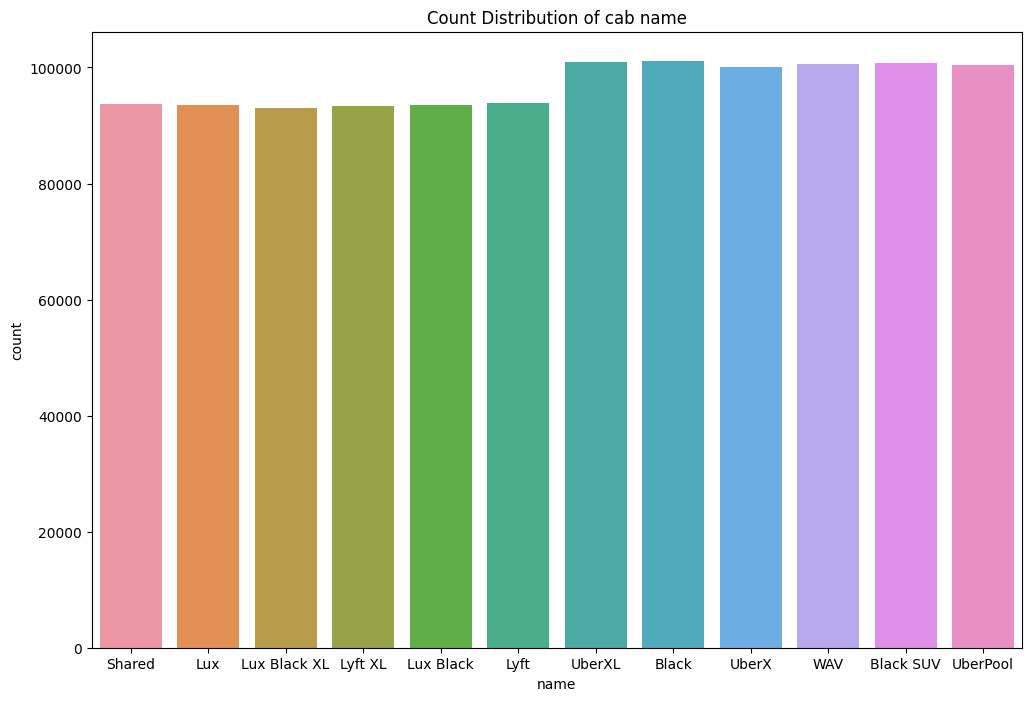

In [24]:
plt.figure(figsize=(12, 8))
ax=sns.countplot(x='name', data=merged_df)
ax.set_title('Count Distribution of cab name');

In [25]:
X = merged_df[['day','distance','cab_type','name','surge_multiplier', 'hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

# X = merged_df[merged_df.cab_type=='lyft'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [26]:
X.count()

day                 1164996
distance            1164996
cab_type            1164996
name                1164996
surge_multiplier    1164996
hour                1164996
temp                1164996
clouds              1164996
pressure            1164996
humidity            1164996
wind                1164996
rain                1164996
dtype: int64

In [27]:
y = merged_df['price'] 
y.count()

1164996

In [28]:
X.reset_index(inplace=True)
X = X.drop(columns=['index'])

In [29]:
X.head(10)

,day,distance,cab_type,name,surge_multiplier,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,Lyft,Shared,1.0,9,38.46,0.29,1022.25,0.76,7.68,0.0000
1,1,0.44,Lyft,Lux,1.0,2,44.31,1.00,1003.17,0.90,13.69,0.1123
2,1,0.44,Lyft,Lux,1.0,2,43.82,0.99,1002.59,0.89,11.57,0.0997
3,4,0.44,Lyft,Lux Black XL,1.0,4,35.08,0.00,1013.71,0.70,5.25,0.0000
4,3,0.44,Lyft,Lyft XL,1.0,3,37.58,0.42,998.64,0.71,11.30,0.0000
5,3,0.44,Lyft,Lyft XL,1.0,3,37.80,0.47,998.20,0.70,11.02,0.0000
6,3,0.44,Lyft,Lyft XL,1.0,3,37.66,0.41,998.42,0.71,11.16,0.0000
7,0,0.44,Lyft,Lux Black,1.0,18,40.78,0.93,1000.15,0.79,7.55,0.0000
8,0,1.08,Lyft,Lyft XL,1.0,5,40.65,0.93,1013.76,0.92,3.01,0.0000
9,0,1.08,Lyft,Lyft XL,1.0,5,40.39,0.92,1013.79,0.93,2.71,0.0000


In [30]:
features = pd.get_dummies(X, dtype=float)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164996 entries, 0 to 1164995
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   day                1164996 non-null  int64  
 1   distance           1164996 non-null  float64
 2   surge_multiplier   1164996 non-null  float64
 3   hour               1164996 non-null  int64  
 4   temp               1164996 non-null  float64
 5   clouds             1164996 non-null  float64
 6   pressure           1164996 non-null  float64
 7   humidity           1164996 non-null  float64
 8   wind               1164996 non-null  float64
 9   rain               1164996 non-null  float64
 10  cab_type_Lyft      1164996 non-null  float64
 11  cab_type_Uber      1164996 non-null  float64
 12  name_Black         1164996 non-null  float64
 13  name_Black SUV     1164996 non-null  float64
 14  name_Lux           1164996 non-null  float64
 15  name_Lux Black     1164996 non-n

In [31]:
# # # # converting to arrays
# # # Labels are the values we want to predict
y = np.array(y)

# # # Saving feature names for later use
feature_list = list(features.columns)
# # # Convert to numpy array
X= np.array(features)

In [32]:
# Using Skicit-learn to import train_test_split
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Logistic Regression
# Price vs features

In [33]:
import statsmodels.api as sm
import sklearn.preprocessing as preprocessing
from scipy.sparse import coo_matrix
from  sklearn.linear_model  import LogisticRegression, LinearRegression
from  sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')


In [34]:
from sklearn.datasets import make_classification

X, y = make_classification()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
logisticReg = LogisticRegression()

In [37]:
model_log =logisticReg.fit(X_train, y_train)
model_log

LogisticRegression()

In [38]:
model_log.coef_

array([[-0.27331166,  0.04783505,  0.05696514, -0.00489868, -0.08492208,
        -0.11877615,  0.35484118, -0.1529818 ,  0.08675567,  0.09251963,
        -0.04741548,  0.09434012, -0.32087079,  1.15072125, -0.16524314,
         0.2313051 , -0.36996248,  2.85673814,  0.16262584,  0.14961192]])

In [39]:
y_pred =logisticReg.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1])

In [44]:
score = logisticReg.score(X_test, y_test)
score

0.96

Measuring model performance



1: Accuracy

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = logisticReg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.96


2: confusion matrix

In [46]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[13  0]
 [ 1 11]]


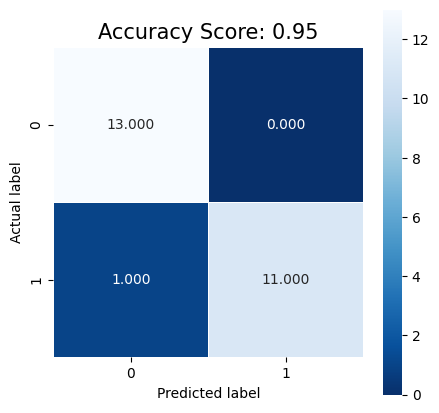

In [49]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [42]:
from sklearn.metrics import mean_squared_error

# Predict on the test set
y_pred = logisticReg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.2


In [43]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation and calculate accuracy scores
cv_scores = cross_val_score(logisticReg, X, y, cv=5, scoring='accuracy')

# Print accuracy scores for each fold
for fold, accuracy in enumerate(cv_scores, start=1):
    print(f"Fold {fold}: Accuracy = {accuracy:.3f}")

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f"\nMean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.3f}")


Fold 1: Accuracy = 0.950
Fold 2: Accuracy = 0.900
Fold 3: Accuracy = 0.950
Fold 4: Accuracy = 0.900
Fold 5: Accuracy = 0.950

Mean Accuracy: 0.930
Standard Deviation of Accuracy: 0.024
